In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [89]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
a=test['PassengerId']

In [90]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
1,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
2,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
707,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
708,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
709,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
710,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S


In [91]:
train.drop(columns=[ "PassengerId","Name", "Ticket", "Cabin"], inplace=True)
test.drop(columns=[ "PassengerId","Name", "Ticket", "Cabin"], inplace=True)

In [92]:

train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,male,45.5,0,0,28.5000,S
1,0,2,male,23.0,0,0,13.0000,S
2,0,3,male,32.0,0,0,7.9250,S
3,0,3,male,26.0,1,0,7.8542,S
4,0,3,female,6.0,4,2,31.2750,S
...,...,...,...,...,...,...,...,...
707,1,3,female,21.0,0,0,7.6500,S
708,0,1,male,NaN,0,0,31.0000,S
709,0,3,male,41.0,2,0,14.1083,S
710,1,1,female,14.0,1,2,120.0000,S


In [93]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,NaN,1,1,15.2458,C
1,2,male,31.0,0,0,10.5000,S
2,3,male,20.0,0,0,7.9250,S
3,2,female,6.0,0,1,33.0000,S
4,3,female,14.0,1,0,11.2417,C
...,...,...,...,...,...,...,...
174,3,male,17.0,0,0,7.1250,S
175,3,male,NaN,0,0,7.2250,C
176,3,female,38.0,1,5,31.3875,S
177,2,female,17.0,0,0,10.5000,S


In [94]:
train['Embarked'].mode()
train.groupby('Embarked').sum()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,68,245,malemalefemalemalefemalemalemalemalefemalefema...,2863.42,44,44,7599.6045
Q,22,173,femalemalemalemalemalefemalemalemalefemalemale...,585.00,31,7,843.9292
S,176,1239,malemalemalemalefemalemalemalemalefemalemalema...,13324.92,319,219,14597.8949


In [95]:
train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)

<ipython-input-95-0da439fa1b32>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S', inplace=True)
<ipython-input-95-0da439fa1b32>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [96]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
train['Sex'] = le_sex.fit_transform(train['Sex'])
unique_op_sex = train['Sex'].unique()
print("Label Encoder Parameters Sex", le_sex.inverse_transform(unique_op_sex))

le_embarked = LabelEncoder()
train['Embarked'] = le_embarked.fit_transform(train['Embarked'])
unique_op_embarked = train['Embarked'].unique()
print("Label Encoder Parameters Embarked", le_embarked.inverse_transform(unique_op_embarked))

test['Sex'] = le_sex.fit_transform(test['Sex'])
unique_op_sex = test['Sex'].unique()
print("Label Encoder Parameters Sex", le_sex.inverse_transform(unique_op_sex))

le_embarked = LabelEncoder()
test['Embarked'] = le_embarked.fit_transform(test['Embarked'])
unique_op_embarked = train['Embarked'].unique()
print("Label Encoder Parameters Embarked", le_embarked.inverse_transform(unique_op_embarked))

Label Encoder Parameters Sex ['male' 'female']
Label Encoder Parameters Embarked ['S' 'C' 'Q']
Label Encoder Parameters Sex ['male' 'female']
Label Encoder Parameters Embarked ['S' 'C' 'Q']


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le_sex = LabelEncoder()
# test['Sex'] = le_sex.fit_transform(test['Sex'])
# unique_op_sex = test['Sex'].unique()
# print("Label Encoder Parameters Sex", le_sex.inverse_transform(unique_op_sex))

# le_embarked = LabelEncoder()
# test['Embarked'] = le_embarked.fit_transform(test['Embarked'])
# unique_op_embarked = train['Embarked'].unique()
# print("Label Encoder Parameters Embarked", le_embarked.inverse_transform(unique_op_embarked))

Label Encoder Parameters Sex ['male' 'female']
Label Encoder Parameters Embarked ['S' 'C' 'Q']


In [97]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,45.5,0,0,28.5000,2
1,0,2,1,23.0,0,0,13.0000,2
2,0,3,1,32.0,0,0,7.9250,2
3,0,3,1,26.0,1,0,7.8542,2
4,0,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...,...
707,1,3,0,21.0,0,0,7.6500,2
708,0,1,1,NaN,0,0,31.0000,2
709,0,3,1,41.0,2,0,14.1083,2
710,1,1,0,14.0,1,2,120.0000,2


In [98]:
test


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,NaN,1,1,15.2458,0
1,2,1,31.0,0,0,10.5000,2
2,3,1,20.0,0,0,7.9250,2
3,2,0,6.0,0,1,33.0000,2
4,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
174,3,1,17.0,0,0,7.1250,2
175,3,1,NaN,0,0,7.2250,0
176,3,0,38.0,1,5,31.3875,2
177,2,0,17.0,0,0,10.5000,2


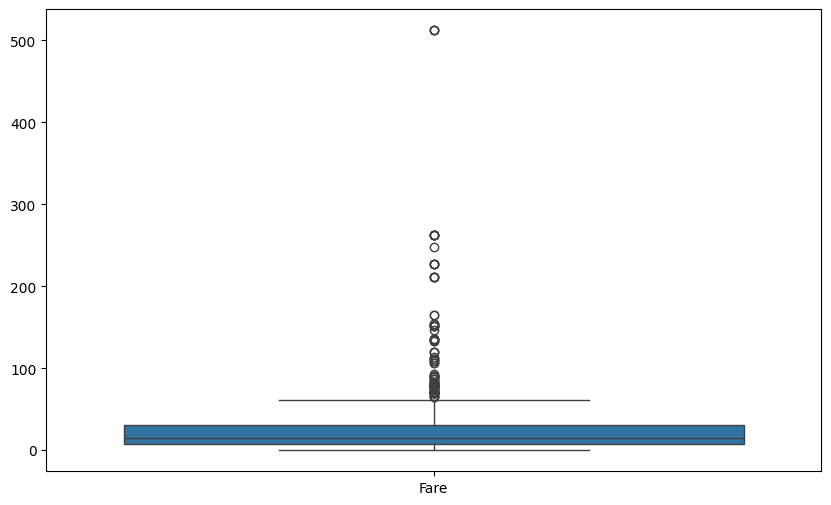

In [99]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train[['Fare']])
plt.show()

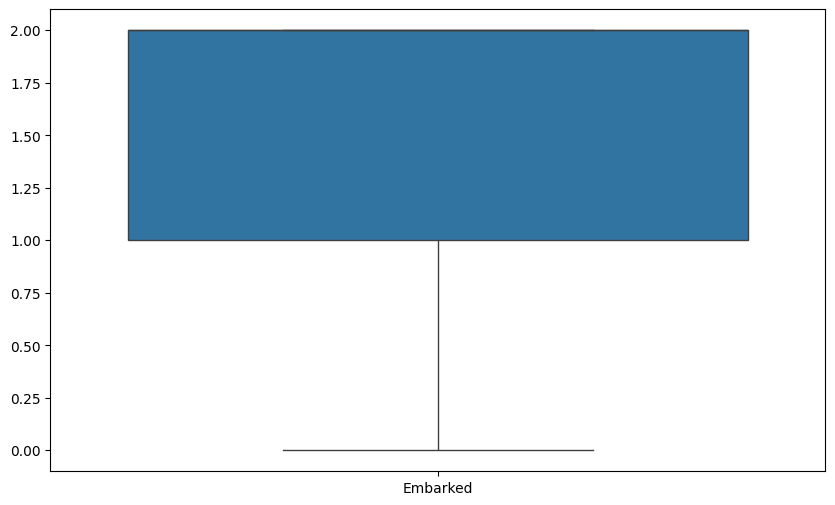

In [100]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train[['Embarked']])
plt.show()

In [101]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
train.loc[:, 'Pclass':] = imputer.fit_transform(train.loc[:, 'Pclass':])
test.loc[:, 'Pclass':] = imputer.transform(test.loc[:, 'Pclass':])

In [102]:
X=train[[ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y=train[['Survived']]
X_test=test[[ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
model=DecisionTreeClassifier()
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid.fit(X, y)
y_pred = grid.predict(X)

y_test=grid.predict(X_test)
accuracy_score(y, y_pred)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


0.8778089887640449

## DecisionTreeClassifier

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree model
model = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create and run the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# Make predictions
y_pred = grid_search.predict(X)
y_test_dt = grid_search.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y, y_pred)
test_accuracy = accuracy_score(y_test, y_test_dt)

# Output the results
print("Train Accuracy: ", accuracy)
print("Test Accuracy: ", test_accuracy)
print("Best Parameters: ", grid_search.best_params_)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
Train Accuracy:  0.8890449438202247
Test Accuracy:  0.9497206703910615
Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [105]:
import pandas as pd
test = pd.read_csv('test.csv')
a = test['PassengerId']
submission = pd.DataFrame({
    'PassengerId': a,
    'Survived': y_test_dt
})
submission.to_csv('submission_dt.csv', index=False)

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define parameter distribution
param_dist = {
    'n_estimators': [10, 25, 50, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 3, 6, 9],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_leaf_nodes': [None, 3, 6],
}

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,
                                  param_distributions=param_dist,
                                  n_iter=50,             # Number of combinations to try
                                  scoring='accuracy',    # Use accuracy as the scoring metric
                                  cv=5,                  # Use 5-fold cross-validation
                                  n_jobs=-1,            # Use all available cores
                                  verbose=1,            # Verbose output
                                  random_state=42)      # For reproducibility

# Fit the model
rand_search.fit(X, y)

# Predict on the training set
y_pred = rand_search.predict(X)

# Predict on the test set
y_test_rf = rand_search.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y, y_pred)
test_accuracy = accuracy_score(y_test, y_test_rf)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Best Parameters:", rand_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Training Accuracy: 0.8385
Test Accuracy: 0.9162
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': 3}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
import pandas as pd
test = pd.read_csv('test.csv')
a = test['PassengerId']
submission = pd.DataFrame({
    'PassengerId': a,
    'Survived': y_test_rf
})
submission.to_csv('submission_rf.csv', index=False)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier()

# Define an expanded parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],       # Increased number of estimators
    'learning_rate': [0.01, 0.1, 0.2],    # More varied learning rates
    'max_depth': [3, 4, 5, 6],            # More options for max depth
    'min_samples_split': [2, 5, 10],      # Control overfitting
    'min_samples_leaf': [1, 2, 4],        # Control overfitting
    'subsample': [0.8, 0.9, 1.0]          # Use of subsampling to reduce variance
}

# Create and run the GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,       # Use all available cores
                           verbose=1)

# Fit the model
grid_search.fit(X, y)

# Make predictions
y_pred = grid_search.predict(X)
y_test_gb = grid_search.predict(X_test)

# Evaluate the model performance
train_accuracy = accuracy_score(y, y_pred)
test_accuracy = accuracy_score(y_test, y_test_gb)

# Output the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Train Accuracy: 0.9073
Test Accuracy: 0.9385
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.9}


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import pandas as pd
test = pd.read_csv('test.csv')
a = test['PassengerId']
submission = pd.DataFrame({
    'PassengerId': a,
    'Survived': y_test_gb
})
submission.to_csv('submission_gb.csv', index=False)

In [67]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize the XGBoost model with some default parameters
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    nthread=1, verbosity=0, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

# Create and run the GridSearchCV
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)
grid_search.fit(X, y)

# Make predictions
y_pred = grid_search.predict(X)
y_test_xg = grid_search.predict(X_test)

# Evaluate the model performance
train_accuracy = accuracy_score(y, y_pred)
test_accuracy = accuracy_score(y_test, y_test_xg)

# Output the results
print("Training Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("Best Parameters: ", grid_search.best_params_)


Fitting 5 folds for each of 405 candidates, totalling 2025 fits


KeyboardInterrupt: 

In [ ]:
import pandas as pd
test = pd.read_csv('test.csv')
a = test['PassengerId']
submission = pd.DataFrame({
    'PassengerId': a,
    'Survived': y_test_xg
})
submission.to_csv('submission_xg.csv', index=False)

In [114]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Initialize the AdaBoost model
model = AdaBoostClassifier()

# Create and run the GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)
grid_search.fit(X, y)

# Make predictions
y_pred = grid_search.predict(X)
y_test_ab = grid_search.predict(X_test)

# Evaluate the model performance
train_accuracy = accuracy_score(y, y_pred)
test_accuracy = accuracy_score(y_test, y_test_ab)

# Output the results
print("Training Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("Best Parameters: ", grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy:  0.8398876404494382
Test Accuracy:  0.8659217877094972
Best Parameters:  {'learning_rate': 0.5, 'n_estimators': 200}


In [115]:
import pandas as pd
test = pd.read_csv('test.csv')
a = test['PassengerId']
submission = pd.DataFrame({
    'PassengerId': a,
    'Survived': y_test_ab
})
submission.to_csv('submission_ab.csv', index=False)